In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)  

In [3]:
df = pd.read_csv("smart_lighting_dataset_2024.csv")  
df

timestamp  zone_id  ambient_light_lux  motion_detected  \
0      2024-01-01 00:00:00        3               0.00                0   
1      2024-01-01 00:43:00        3              35.78                0   
2      2024-01-01 01:27:00        7               0.00                0   
3      2024-01-01 02:11:00        2               0.00                1   
4      2024-01-01 02:55:00        4               0.00                1   
...                    ...      ...                ...              ...   
11995  2024-12-30 21:04:00        2               0.00                0   
11996  2024-12-30 21:48:00        7             170.09                0   
11997  2024-12-30 22:32:00        6             176.03                0   
11998  2024-12-30 23:16:00        3             375.50                1   
11999  2024-12-31 00:00:00       10             408.41                0   

       temperature_celsius  occupancy_count day_of_week time_of_day  \
0                    22.08                7      Monday       Night   
1                    19.19                6      Monday       Night   
2                    27.78                9      Monday       Night   
3                    33.11               16      Monday       Night   
4                    27.07               11      Monday       Night   
...                    ...              ...         ...         ...   
11995                24.84               13      Monday       Night   
11996                20.16                5      Monday       Night   
11997                28.53                8      Monday       Night   
11998                34.16               11      Monday       Night   
11999                18.23               15     Tuesday       Night   

      weather_condition  special_event_flag  energy_price_per_kwh  \
0                Cloudy                   0                  3.83   
1                Cloudy                   0                  4.61   
2                 Clear                   0                  4.21   
3                 Foggy                   0                  6.16   
4                 Clear                   0                  5.72   
...                 ...                 ...                   ...   
11995             Clear                   0                  4.19   
11996             Clear                   0                  3.95   
11997             Rainy                   0                  3.02   
11998             Clear                   0                  3.94   
11999             Rainy                   0                  6.09   

       prev_hour_energy_usage_kwh  traffic_density  avg_pedestrian_speed  \
0                            3.27             26.0                  4.54   
1                            1.50             18.9                  2.42   
2                            2.51             27.6                  2.85   
3                            0.34             23.1                  2.45   
4                            1.52             26.4                  3.49   
...                           ...              ...                   ...   
11995                        3.96             15.6                  4.49   
11996                        2.24             20.5                  1.76   
11997                        4.14             35.3                  3.53   
11998                        3.82             30.0                  2.52   
11999                        1.84             28.0                  2.56   

       adjusted_light_intensity  energy_consumption_kwh  lighting_action_class  
0                         54.40                   1.144                      0  
1                         89.75                   2.069                      1  
2                         82.25                   1.687                      1  
3                         72.57                   1.631                      1  
4                         78.79                   1.737                      1  
...                         ...    

In [4]:
print(df.shape)

(12000, 17)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   12000 non-null  object 
 1   zone_id                     12000 non-null  int64  
 2   ambient_light_lux           12000 non-null  float64
 3   motion_detected             12000 non-null  int64  
 4   temperature_celsius         12000 non-null  float64
 5   occupancy_count             12000 non-null  int64  
 6   day_of_week                 12000 non-null  object 
 7   time_of_day                 12000 non-null  object 
 8   weather_condition           12000 non-null  object 
 9   special_event_flag          12000 non-null  int64  
 10  energy_price_per_kwh        12000 non-null  float64
 11  prev_hour_energy_usage_kwh  12000 non-null  float64
 12  traffic_density             12000 non-null  float64
 13  avg_pedestrian_speed        120

In [6]:
df.isnull().sum()

timestamp                     0
zone_id                       0
ambient_light_lux             0
motion_detected               0
temperature_celsius           0
occupancy_count               0
day_of_week                   0
time_of_day                   0
weather_condition             0
special_event_flag            0
energy_price_per_kwh          0
prev_hour_energy_usage_kwh    0
traffic_density               0
avg_pedestrian_speed          0
adjusted_light_intensity      0
energy_consumption_kwh        0
lighting_action_class         0
dtype: int64

In [7]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
           zone_id  ambient_light_lux  motion_detected  temperature_celsius  \
count  12000.00000       12000.000000     12000.000000         12000.000000   
mean       6.53425        3708.629288         0.284083            24.964518   
std        3.48035        4656.283063         0.450996             6.260797   
min        1.00000           0.000000         0.000000           -15.870000   
25%        4.00000          55.565000         0.000000            20.970000   
50%        7.00000        2031.855000         0.000000            24.970000   
75%       10.00000        7011.792500         1.000000            29.082500   
max       12.00000      105403.500000         1.000000            64.860000   

       occupancy_count  special_event_flag  energy_price_per_kwh  \
count     12000.000000        12000.000000          12000.000000   
mean          8.557167            0.008583              5.034449   
std           8.273770            0.092252              1.272504

In [8]:
print("\nAverage Energy by Time of Day:")
print(df.groupby('time_of_day')['energy_consumption_kwh'].mean())
print("\nAverage Energy by Weather:")
print(df.groupby('weather_condition')['energy_consumption_kwh'].mean())


Average Energy by Time of Day:
time_of_day
Afternoon    1.144962
Evening      1.713146
Morning      1.281955
Night        1.704122
Name: energy_consumption_kwh, dtype: float64

Average Energy by Weather:
weather_condition
Clear     1.427292
Cloudy    1.426714
Foggy     1.698023
Rainy     1.713004
Name: energy_consumption_kwh, dtype: float64


In [9]:
df = df.drop(['motion_detected', 'special_event_flag'], axis=1)

In [10]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["is_weekend"] = df["timestamp"].dt.dayofweek >= 5

In [11]:
df['day_of_week'] = df['day_of_week'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6})

In [12]:
df = pd.get_dummies(df, columns=['time_of_day'])
df = pd.get_dummies(df, columns=['weather_condition'])

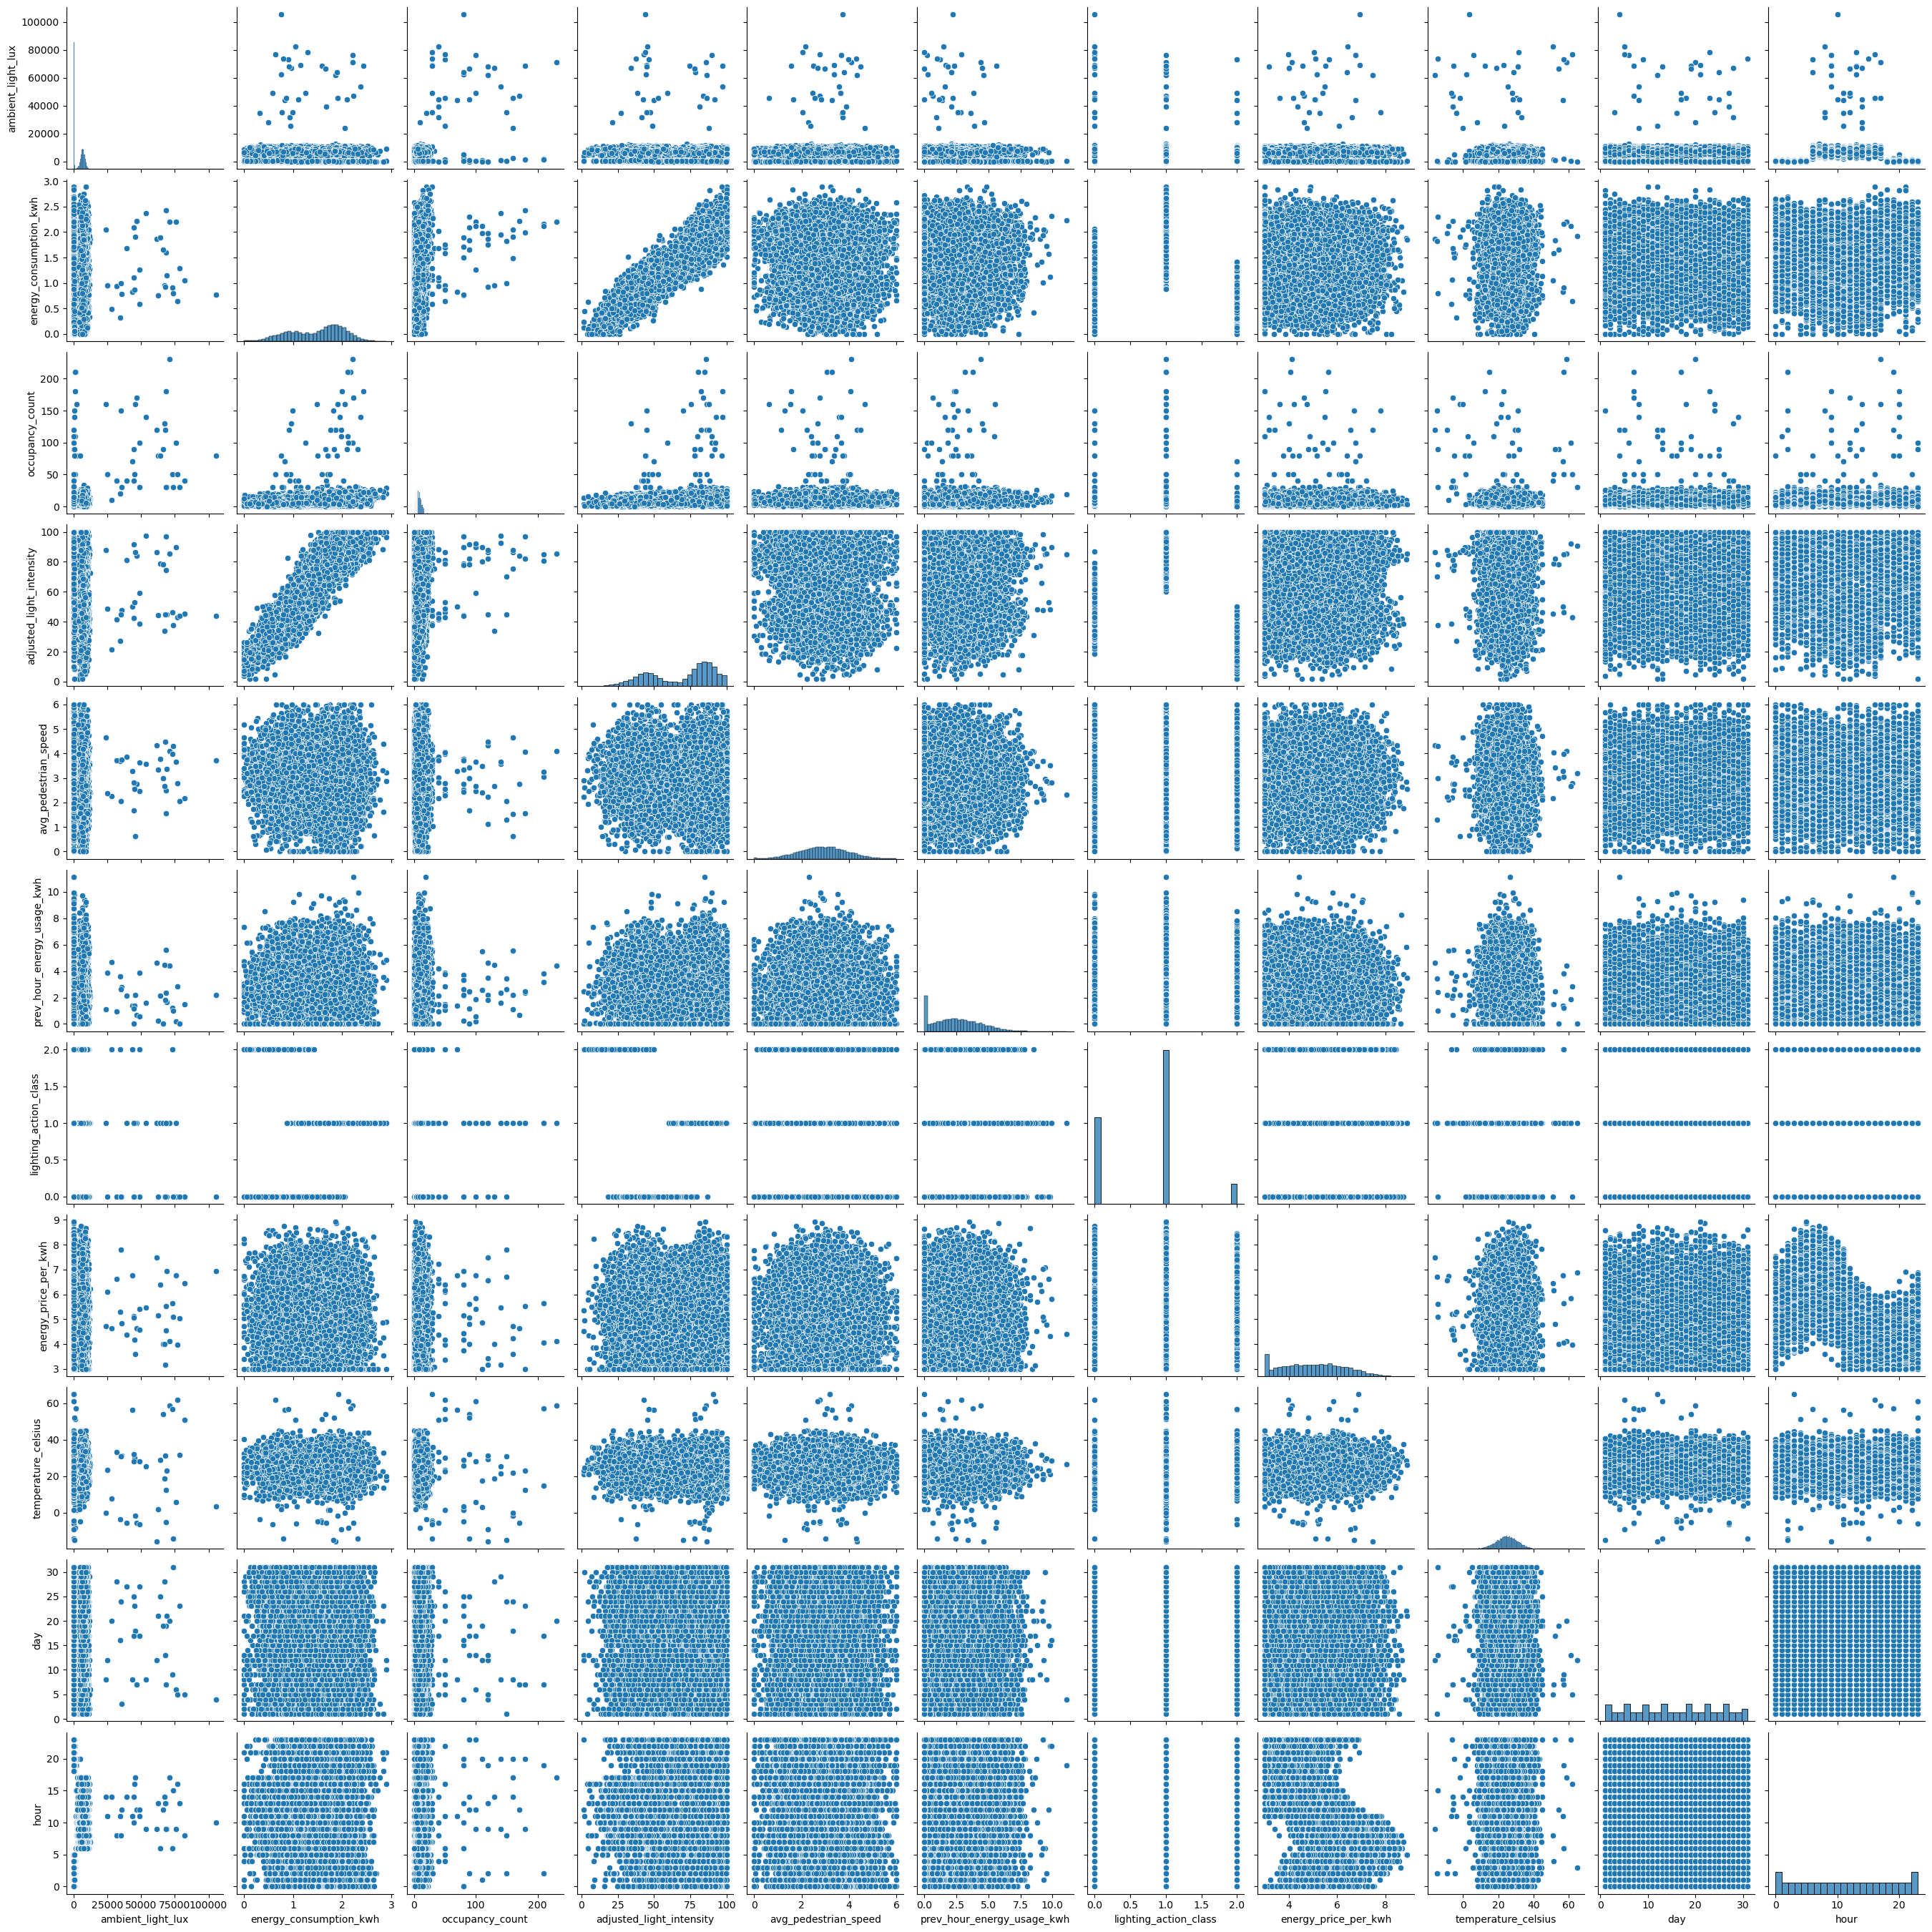

In [12]:
sns.pairplot(df[['ambient_light_lux', 'energy_consumption_kwh', 'occupancy_count', 'adjusted_light_intensity', 'avg_pedestrian_speed',"prev_hour_energy_usage_kwh","lighting_action_class","energy_price_per_kwh","temperature_celsius","day","hour"]])

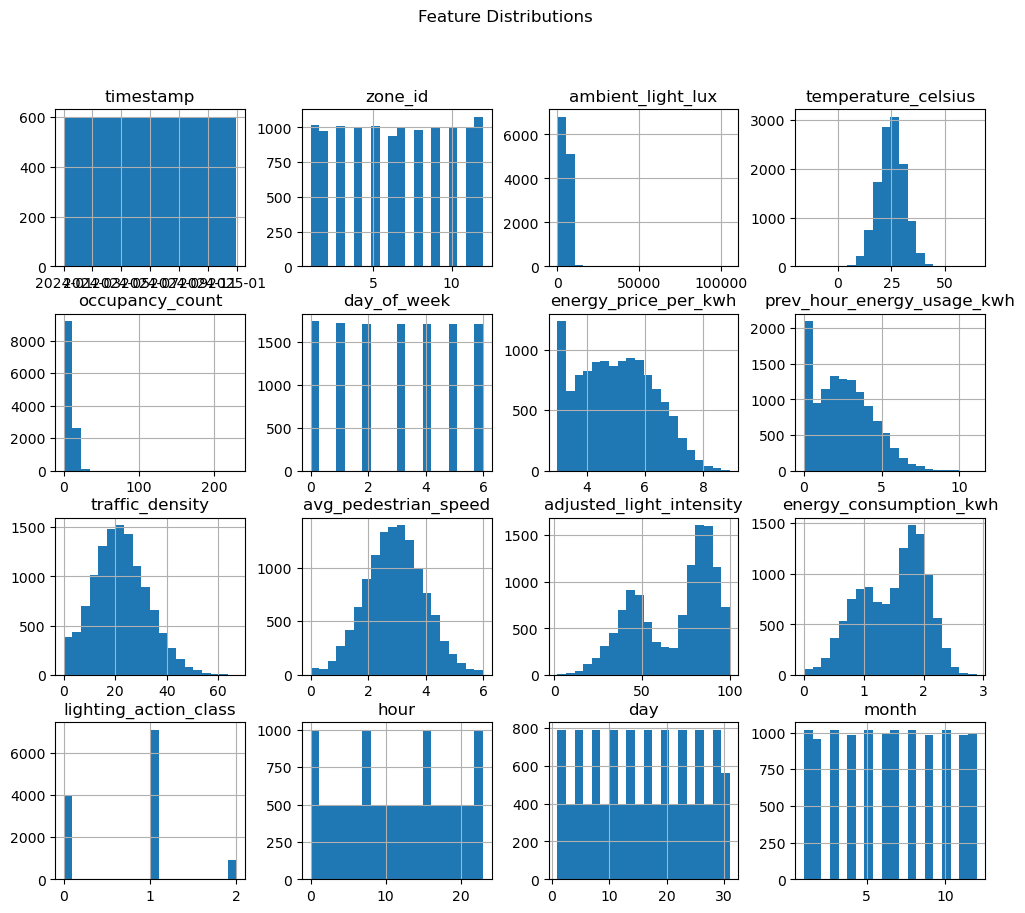

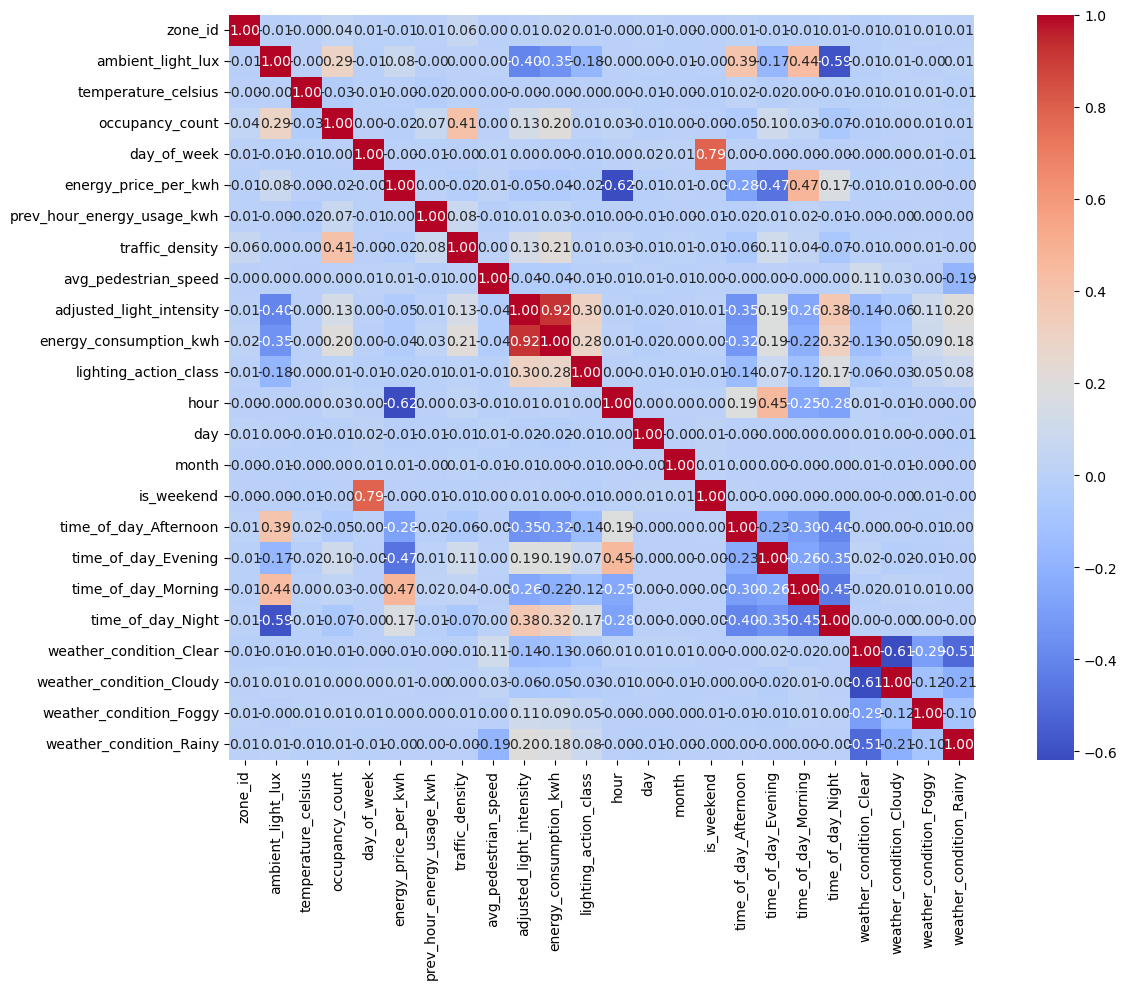

In [13]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm', 
            square=True,
            fmt='.2f',  
            annot_kws={'size': 10})  
plt.tight_layout()
plt.show()

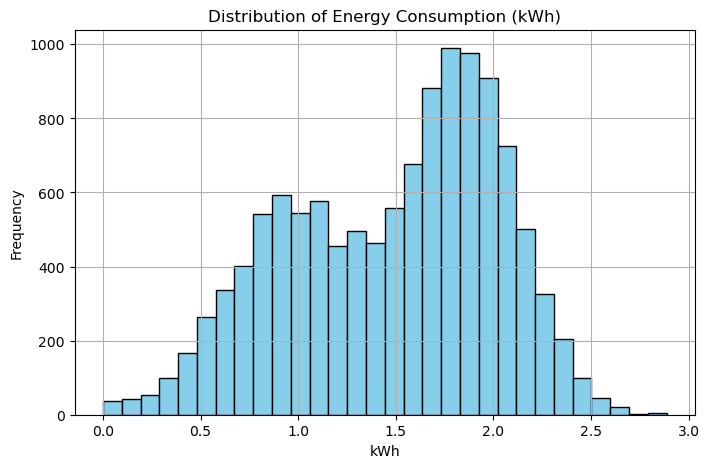

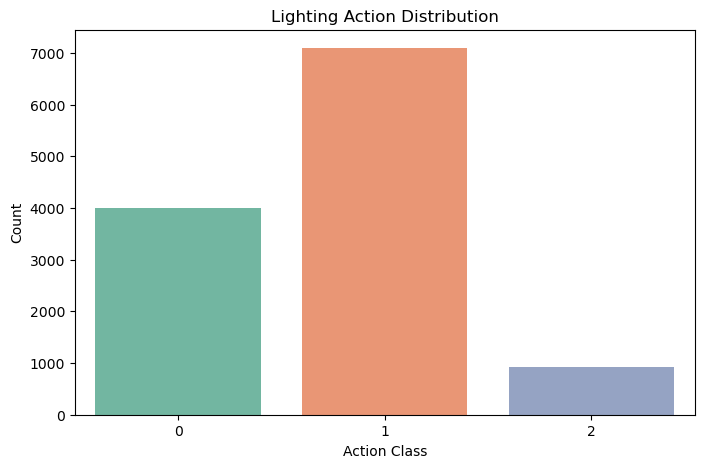

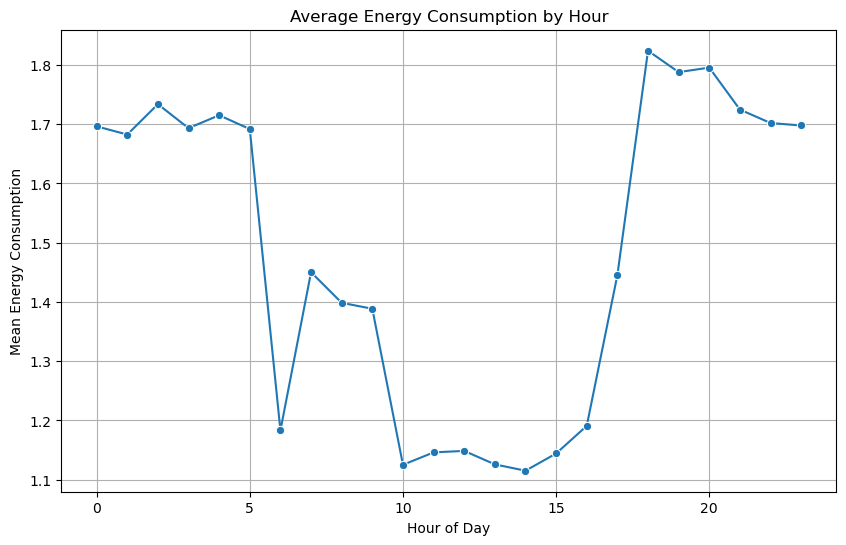

In [14]:
plt.figure(figsize=(8,5))
df["energy_consumption_kwh"].hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Energy Consumption (kWh)")
plt.xlabel("kWh")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="lighting_action_class", data=df, palette="Set2")
plt.title("Lighting Action Distribution")
plt.xlabel("Action Class")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(10,6))
sns.lineplot(x="hour", y="energy_consumption_kwh", data=df, estimator="mean", ci=None, marker="o")
plt.title("Average Energy Consumption by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Energy Consumption")
plt.grid(True)
plt.show()

In [15]:
Q1 = df['energy_consumption_kwh'].quantile(0.25)
Q3 = df['energy_consumption_kwh'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['energy_consumption_kwh'] < (Q1 - 1.5 * IQR)) | (df['energy_consumption_kwh'] > (Q3 + 1.5 * IQR))]
print("\nOutliers in Energy Consumption:")
print(outliers)


Outliers in Energy Consumption:
Empty DataFrame
Columns: [timestamp, zone_id, ambient_light_lux, temperature_celsius, occupancy_count, day_of_week, energy_price_per_kwh, prev_hour_energy_usage_kwh, traffic_density, avg_pedestrian_speed, adjusted_light_intensity, energy_consumption_kwh, lighting_action_class, hour, day, month, is_weekend, time_of_day_Afternoon, time_of_day_Evening, time_of_day_Morning, time_of_day_Night, weather_condition_Clear, weather_condition_Cloudy, weather_condition_Foggy, weather_condition_Rainy]
Index: []

[0 rows x 25 columns]


In [16]:
x = df.drop(["timestamp", "energy_consumption_kwh"], axis=1)
y = df["energy_consumption_kwh"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
model = RandomForestRegressor(n_estimators = 100 ,random_state = 42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = model.predict(x_test)

In [21]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2:", r2_score(y_test, y_pred))

MAE: 0.16727729583333337
MSE: 0.044628660811291666
RMSE: 0.21125496635888036
R^2: 0.8487404373536931


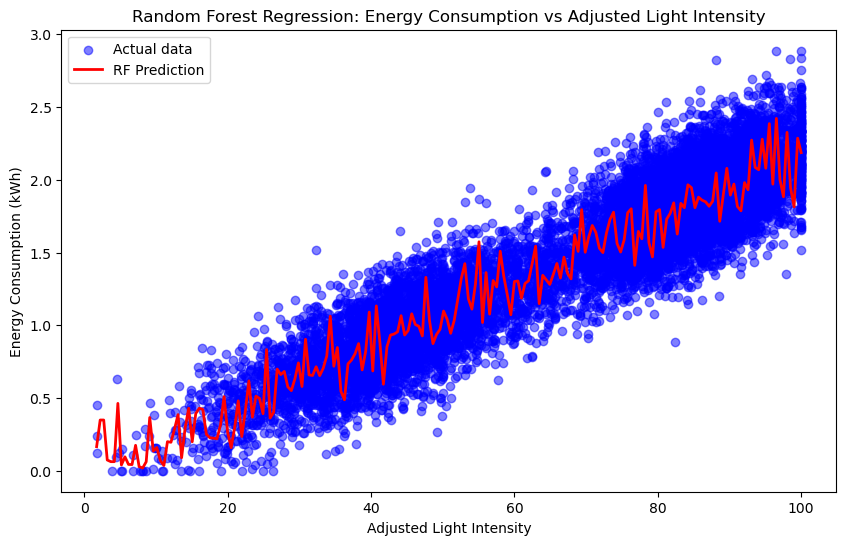

In [22]:
X_feature = x[["adjusted_light_intensity"]]  
y_target = y

# Train RF model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_feature, y_target)

# Smooth range for plotting
import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace(X_feature.min(), X_feature.max(), 200).reshape(-1, 1)
y_pred = rf.predict(x_range)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X_feature, y_target, color="blue", alpha=0.5, label="Actual data")
plt.plot(x_range, y_pred, color="red", linewidth=2, label="RF Prediction")
plt.xlabel("Adjusted Light Intensity")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Random Forest Regression: Energy Consumption vs Adjusted Light Intensity")
plt.legend()
plt.show()


In [23]:
a = df.drop(["timestamp", "lighting_action_class"], axis=1)
b = df["lighting_action_class"]

In [24]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)

In [26]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(a_train, b_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [27]:
y_pred_clf = classifier.predict(a_test)

In [28]:
print(" Classification Results:")
print("Accuracy:", accuracy_score(b_test, y_pred_clf))
print("Report:\n", classification_report(b_test, y_pred_clf))

 Classification Results:
Accuracy: 0.9479166666666666
Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       802
           1       0.99      0.99      0.99      1402
           2       0.90      0.61      0.73       196

    accuracy                           0.95      2400
   macro avg       0.93      0.85      0.88      2400
weighted avg       0.95      0.95      0.95      2400



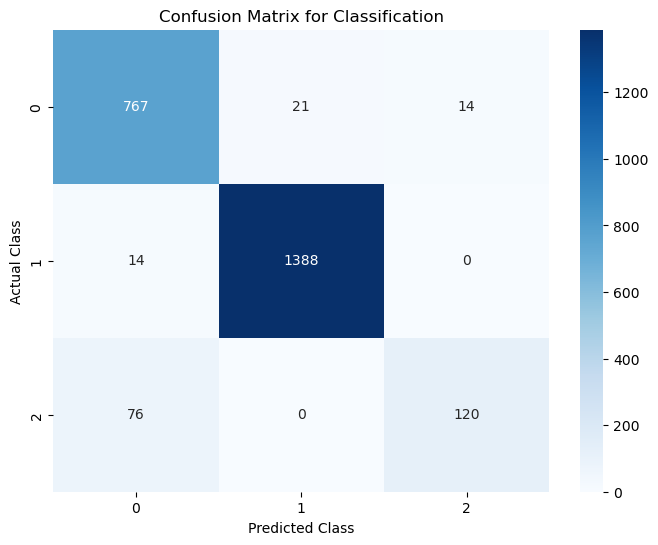

In [29]:
# Classification Visualizations
cm = confusion_matrix(b_test, y_pred_clf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Classification')
plt.show()